Apply hadamard transfrom on the an image and use it for image compression

In [10]:
from scipy.linalg import hadamard
import numpy as np
import matplotlib.pyplot as plt

In [21]:
N=4
H=hadamard(N)
img = np.random.randint(20,size=(N,N))
print(H)

[[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]]


In [22]:
Af = np.dot(H,img)
F = np.dot(Af,np.transpose(H)) # (matrix multiplication 1st col and 1st row each element * and then +)

In [23]:
ATF = np.dot(np.transpose(H),F)
F_inv = np.dot(ATF,H)
F_inv = F_inv//(N*N)
print(img)
print('\n')
print(F)
print('\n')
print(F_inv)

[[ 2 13  5  4]
 [10  4 15  4]
 [ 7  8  2 18]
 [ 2  7 15 12]]


[[128 -12 -22 -10]
 [-10 -42  24  16]
 [-14  26  24 -24]
 [ -8 -12  -2 -30]]


[[ 2 13  5  4]
 [10  4 15  4]
 [ 7  8  2 18]
 [ 2  7 15 12]]


In [26]:
from skimage import io

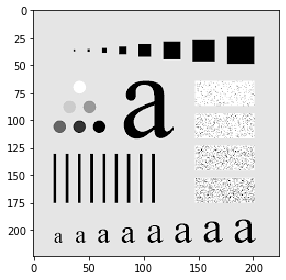

In [120]:
img = io.imread("test.png")
image = img.copy()
io.imshow(image)

In [127]:
def hada_transform(f,N):
    H = hadamard(N)
    F = np.dot(np.dot(H,f),np.transpose(H))
    F[N-4:N,N-4:N]=0 #doing some values 0 from 8*8 matirx which compresses the image more but image is distorted when hada_inv is applied as some values are 0
    return (F)
def hada_inv_transform(F,N):
    H = hadamard(N)
    f = np.dot(np.dot(np.transpose(H),F),H)
    f=f//(N*N)
    return (f)

In [128]:
[row,col] = image.shape

In [129]:
N=8
image_hada =np.zeros((row,col),dtype=int)

In [130]:
for r in range(row//N):
    for c in range(col//N):
        temp = image[r*N:(r+1)*N,c*N:(c+1)*N]
        image_hada[r*N:(r+1)*N,c*N:(c+1)*N] = hada_transform(temp,N)

In [131]:
image_inv = np.zeros((row,col),dtype=int)
for r in range(row//N):
    for c in range(col//N):
        temp = image_hada[r*N:(r+1)*N,c*N:(c+1)*N]
        image_inv[r*N:(r+1)*N,c*N:(c+1)*N] = hada_inv_transform(temp,N)

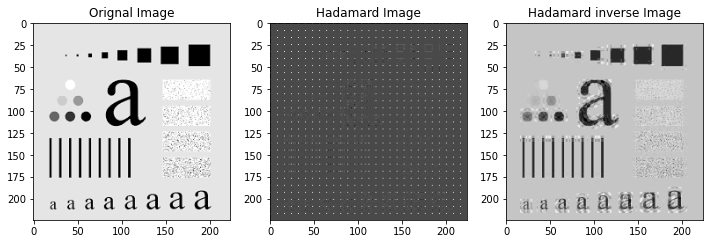

In [132]:
plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.title('Orignal Image')
plt.imshow(image,cmap="gray")
plt.subplot(1,3,2)
plt.title('Hadamard Image')
plt.imshow(image_hada,cmap="gray")
plt.subplot(1,3,3)
plt.title('Hadamard inverse Image')
plt.imshow(image_inv,cmap="gray")


Hadamard transform is applied on the given image if inverse of hadamard transform is determined for the transformed image we get orignal image. To compress the given image last 4 rows and columns of hadamarad transfrom 8 * 8 subimage are converted to 0. It shows that the inverse transformation of the image is distroted instead of this if last 2 rows and 2 columns are converted to 0, the image and inverse image transfrom image are similar. To achieve compression the image last 6 rows and 6 columns are converted to 0, the compress image is completely distorted and is beyound acceptable range.